In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("student_lifestyle_dataset.csv")
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [98]:
df.drop(columns=['Student_ID'], inplace=True)
df.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,8.1,0.6,6.5,2.2,6.6,3.51,High


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Study_Hours_Per_Day              2000 non-null   float64
 1   Extracurricular_Hours_Per_Day    2000 non-null   float64
 2   Sleep_Hours_Per_Day              2000 non-null   float64
 3   Social_Hours_Per_Day             2000 non-null   float64
 4   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 5   GPA                              2000 non-null   float64
 6   Stress_Level                     2000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 109.5+ KB


In [102]:
df.describe()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


In [104]:
df.Stress_Level.value_counts()

Stress_Level
High        1029
Moderate     674
Low          297
Name: count, dtype: int64

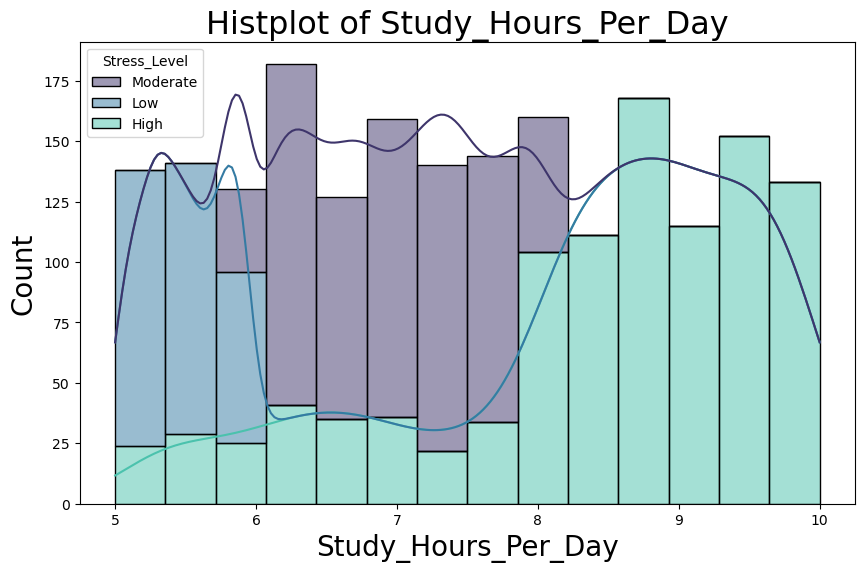

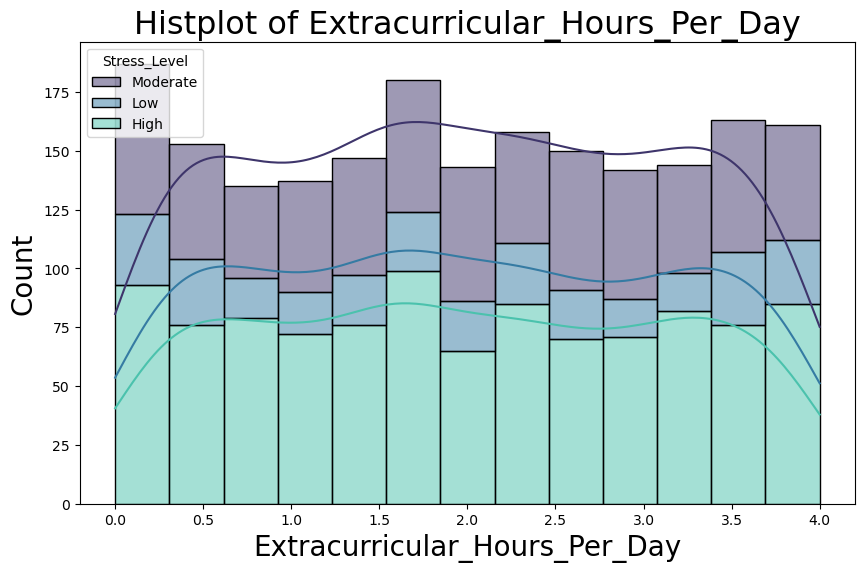

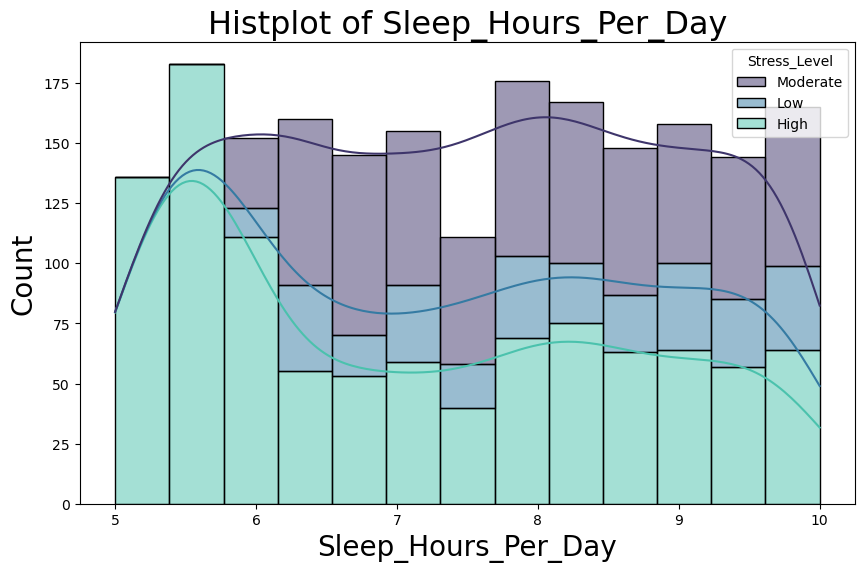

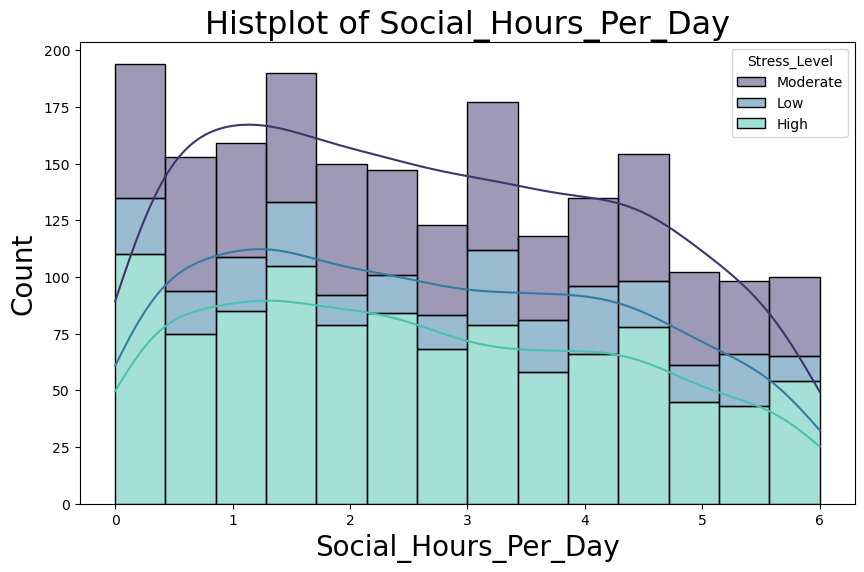

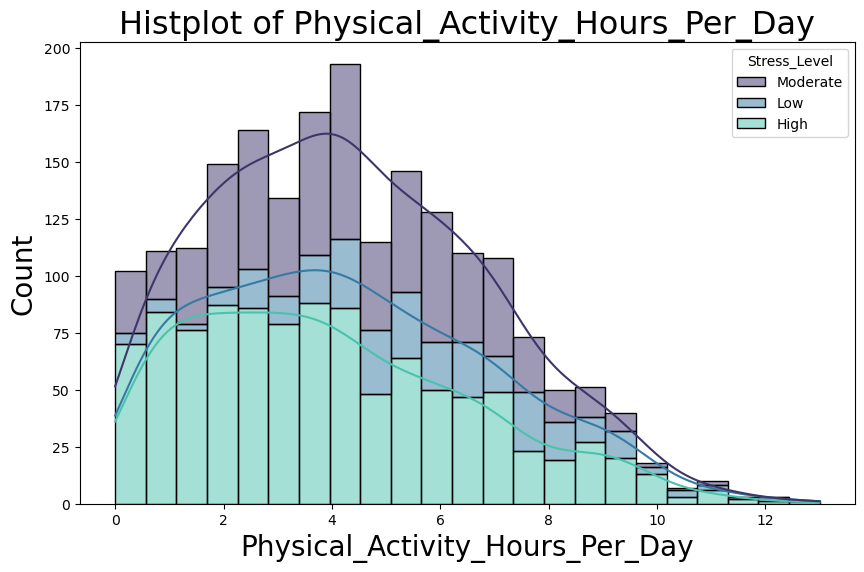

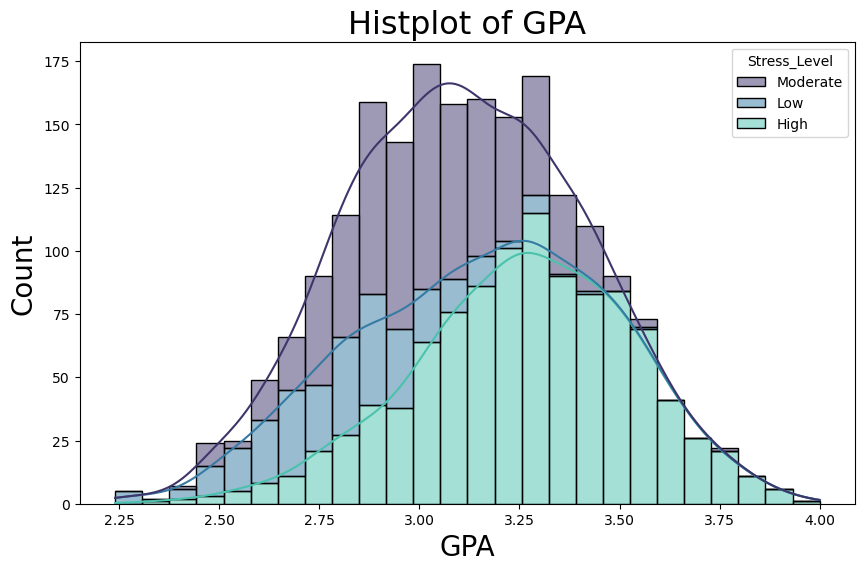

In [106]:
for col in df:
    if col == 'Stress_Level': continue
    plt.figure(figsize=(10,6))
    
    plt.xlabel(col, fontsize=20)
    plt.ylabel("Count", fontsize=20)
    
    plt.title("Histplot of " + col, fontsize=23)
    
    sns.histplot(data=df, x=col, kde=True, palette='mako', hue='Stress_Level', multiple='stack')
    
    plt.show()

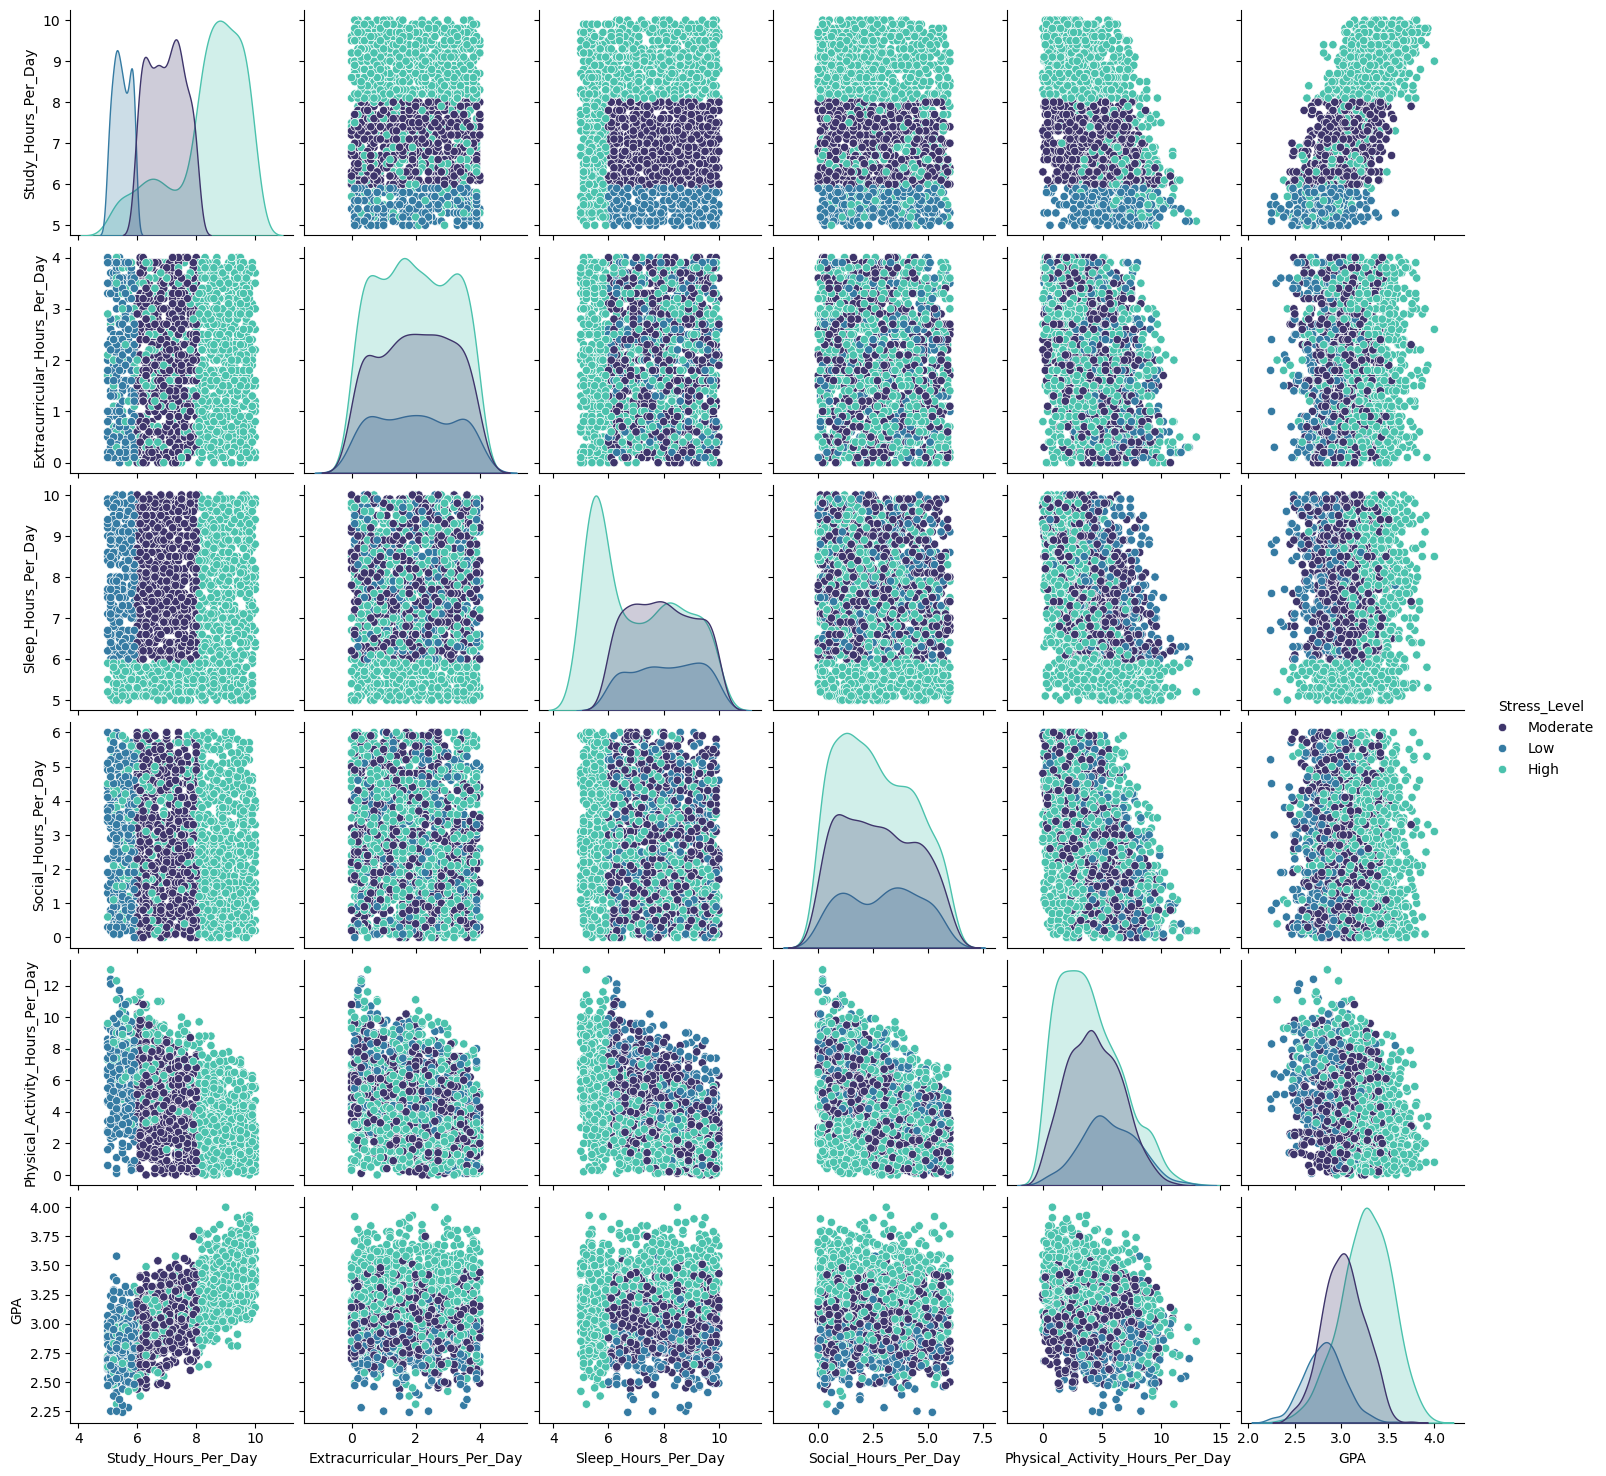

In [107]:
sns.pairplot(df, hue='Stress_Level', palette='mako');

In [108]:
le = LabelEncoder()
le.fit(df['Stress_Level'])

LabelEncoder()

In [109]:
df["Stress_Level"] = le.transform(df['Stress_Level'])

In [113]:
df.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,6.9,3.8,8.7,2.8,1.8,2.99,2
1,5.3,3.5,8.0,4.2,3.0,2.75,1
2,5.1,3.9,9.2,1.2,4.6,2.67,1
3,6.5,2.1,7.2,1.7,6.5,2.88,2
4,8.1,0.6,6.5,2.2,6.6,3.51,0


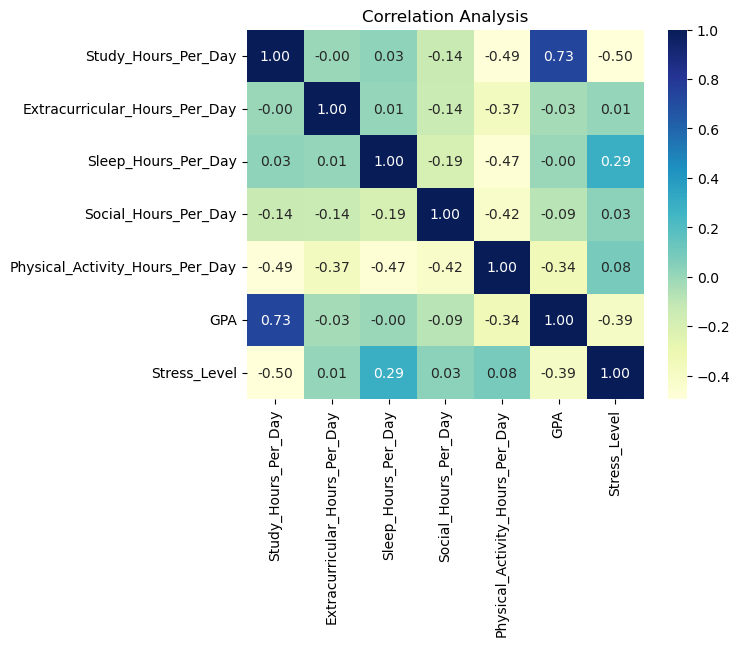

In [115]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', fmt='.2f');
plt.title("Correlation Analysis")
plt.show();

## Modeling

In [118]:
df.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,6.9,3.8,8.7,2.8,1.8,2.99,2
1,5.3,3.5,8.0,4.2,3.0,2.75,1
2,5.1,3.9,9.2,1.2,4.6,2.67,1
3,6.5,2.1,7.2,1.7,6.5,2.88,2
4,8.1,0.6,6.5,2.2,6.6,3.51,0


In [120]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

In [122]:
X = df.drop(columns=['Stress_Level'])
y = df['Stress_Level']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

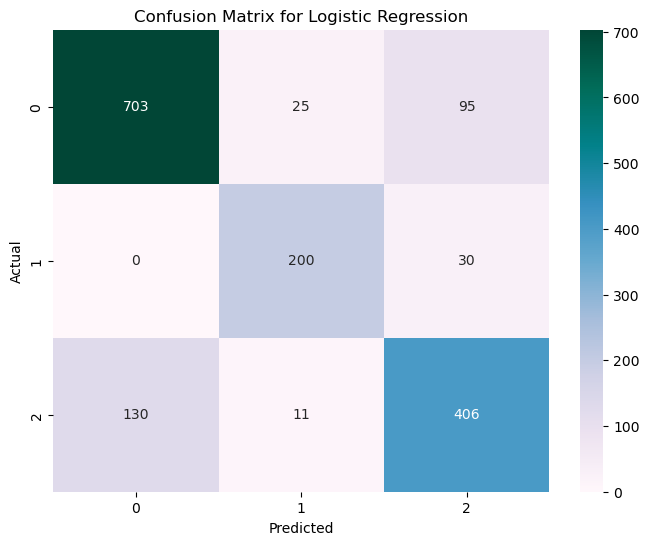


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       823
           1       0.85      0.87      0.86       230
           2       0.76      0.74      0.75       547

    accuracy                           0.82      1600
   macro avg       0.82      0.82      0.82      1600
weighted avg       0.82      0.82      0.82      1600



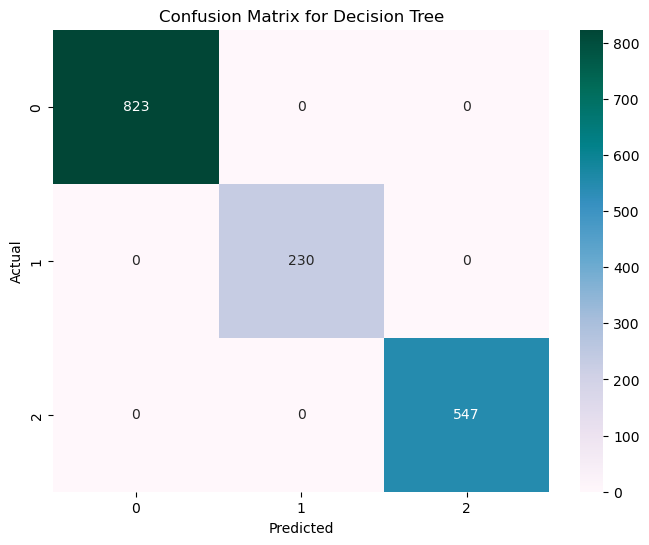


Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       823
           1       1.00      1.00      1.00       230
           2       1.00      1.00      1.00       547

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



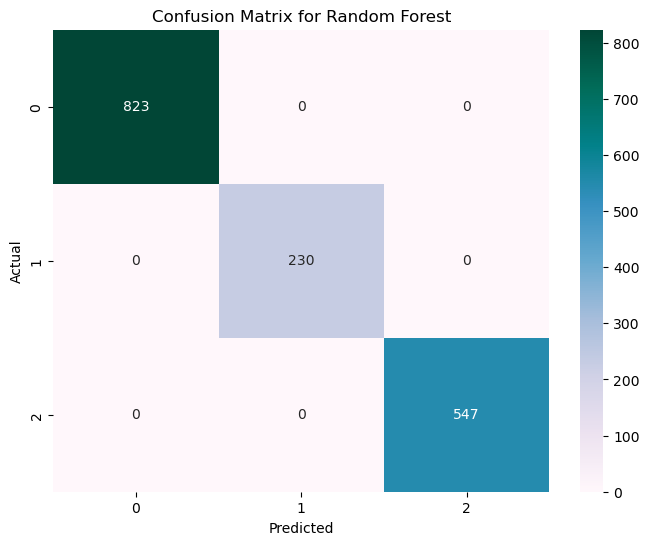


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       823
           1       1.00      1.00      1.00       230
           2       1.00      1.00      1.00       547

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600


Model Evaluation Summary:



,Accuracy,AUC
Logistic Regression,0.818125,0.945833
Decision Tree,1.000000,1.000000
Random Forest,1.000000,1.000000


In [126]:
def train_and_evaluate_models(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)

        preds = model.predict(X_test)
        accuracy = accuracy_score(y_train, model.predict(X_train))
        auc = (
            roc_auc_score(y_train, model.predict_proba(X_train), multi_class="ovr") 
            if hasattr(model, 'predict_proba') else 'N/A'
        )

        results[name] = {
            'Accuracy': accuracy,
            'AUC': auc,
            'Predictions': preds
        }

        conf_matrix = confusion_matrix(y_train, model.predict(X_train))
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBuGn',
                    xticklabels=model.classes_, yticklabels=model.classes_)
        plt.title(f'Confusion Matrix for {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        print(f"\nClassification Report for {name}:\n")
        print(classification_report(y_train, model.predict(X_train)))

    results_df = pd.DataFrame({
        name: {"Accuracy": results[name]["Accuracy"], "AUC": results[name]["AUC"]}
        for name in results
    }).T

    print("\nModel Evaluation Summary:\n")
    return results_df

evaluation_summary = train_and_evaluate_models(models, X_train, y_train, X_test, y_test)

evaluation_summary

In [138]:
clf = models["Random Forest"]
feature_dict = dict(zip(df.columns, list(clf.feature_importances_)))
feature_dict

{'Study_Hours_Per_Day': 0.6173969214324284,
 'Extracurricular_Hours_Per_Day': 0.013782289143795097,
 'Sleep_Hours_Per_Day': 0.22974820310880495,
 'Social_Hours_Per_Day': 0.020968554726969,
 'Physical_Activity_Hours_Per_Day': 0.042201636306600086,
 'GPA': 0.07590239528140236}

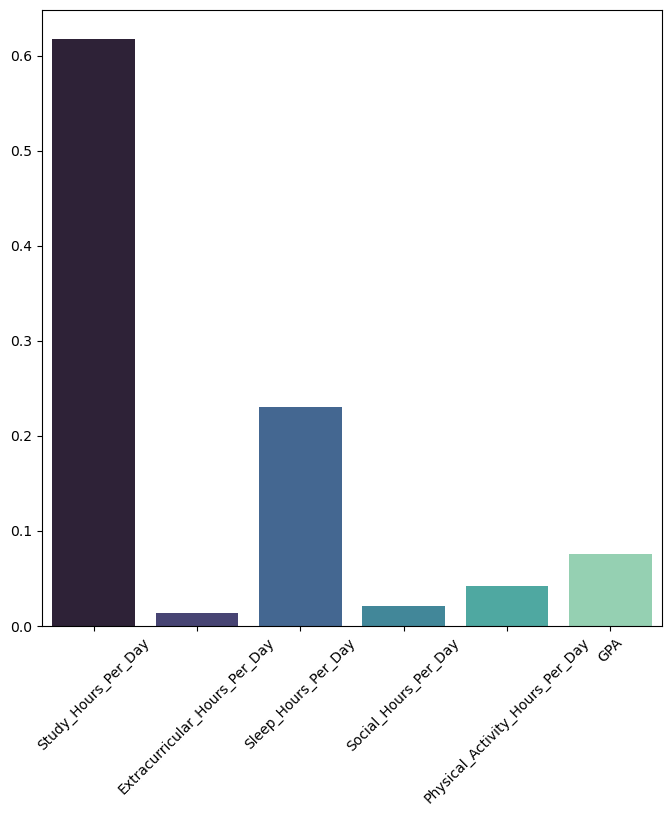

In [164]:
feature_df = pd.DataFrame(feature_dict, index=[0])
plt.figure(figsize=(8, 8))
sns.barplot(feature_df, palette='mako')
plt.xticks(rotation=45);

In [170]:
import pickle as pk
pk.dump(clf, open('student_stress_clf.pkl', 'wb'))